In [ ]:
# Imports
import os
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


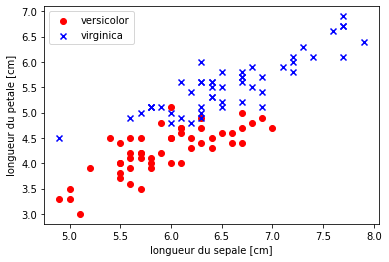

In [ ]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

# selectionn de setosa et versicolor
y = df.iloc[50:150, 4].values

# precedemment, on s'interessait à deux autres classes
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == 'Iris-versicolor', -1, 1)

# extraction de la longueur du sepale length et de la longueur du petale
X = df.iloc[50:150, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('longueur du sepale [cm]')
plt.ylabel('longueur du petale [cm]')
plt.legend(loc='upper left')

plt.show()

##I Fuites de données

1.   Détecter (et corriger) la fuite de données dans les deux portions de code suivantes. 
2.   En vous inspirant de ces codes (après les avoir corrigé), implémenter un méthode de validation croisée (à n-fold) pour estimer les performances en généralisation d'un SVM (avec ses paramètres par défaut) sur des données standardisées.


In [ ]:
# premier exemple de fuite de données

from sklearn.preprocessing import StandardScaler

np.random.seed(seed=42)

# separation des données d'apprentissage et de test
n=X.shape[0]
sep=np.ones((n))
sep[0:int(2*n/5)]=0
np.random.shuffle(sep)

X_train = X[sep==0]
y_train = y[sep==0]
X_test = X[sep==1]
y_test = y[sep==1]

#standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# application du classifieur et calcul du taux de bonne classification
svm1=SVC(C=50)
svm1.fit(X_train,y_train)

y_pred= svm1.predict(X_test)
print('accuracy = ',np.sum(y_test==y_pred)/y_pred.shape[0])

accuracy =  0.8


In [ ]:
# deuxieme exemple de fuite de données

np.random.seed(seed=31)

def Separateur(X,y):
  n=X.shape[0]
  sep=np.ones((n))
  sep[0:int(n/5)]=0
  np.random.shuffle(sep)
  X_test=X[sep==1]
  X_train=X[sep==0]
  y_test=y[sep==1]
  y_train=y[sep==0]
  return X_train,y_train,X_test,y_test

# separation des données d'apprentissage et de test
X_train,y_train,X_test,y_test=Separateur(X,y)


svm1=SVC(C=50)
svm1.fit(X_train,y_train)

y_pred= svm1.predict(X_test)
print('accuracy = ',np.sum(y_test==y_pred)/y_pred.shape[0])

accuracy =  0.875


In [ ]:
# validation croisée LOO & standardisation




##II Données désequilibrées et multi-classe

1.   Entraîner un SVM (avec les paramètres par défaut) pour discriminer la classe *'Iris-setosa'* contre les deux autres.
2.   En partant de ce code, créer un classifieur multiclasse (en utilisant la stratégie "One vs All").




In [ ]:
# SVM classe 1 vs (2&3)

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,header=None,encoding='utf-8')

# selectionn de setosa et versicolor
y = df.iloc[0:150, 4].values

# precedemment, on s'interessait à deux autres classes
y = np.where(y == 'Iris-setosa', 1, y)
y = np.where(y == 'Iris-versicolor', 2, y)
y = np.where(y == 'Iris-virginica', 3, y)

# extraction de la longueur du sepale length et de la longueur du petale
X = df.iloc[0:150, [0, 2]].values

X_train,y_train,X_test,y_test=Separateur(X,y)

y1vsall_train = np.where(y_train ==1, 1, -1)
y1vsall_test = np.where(y_test ==1, 1, -1)

svm1vsall=SVC(C=50)
svm1vsall.fit(X_train,y1vsall_train)

y_pred = svm1vsall.predict(X_test)

print('accuracy = ', np.sum(y1vsall_test==y_pred)/y_pred.shape[0])


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
accuracy =  1.0


In [ ]:
# SVM multi-classe - OVA 
# /!\ (pour cela, on regardera dans la documentation commment convertir la sortie du SVM en probabilité)

y_proba_ova = np.zeros((X_test.shape[0],3))

for i in range(0,3):
  y1vsall_train = np.where(y_train ==i+1, 1, -1)
  y1vsall_test = np.where(y_test ==i+1, 1, -1)

  svm1vsall=SVC(C=50, probability=True)
  svm1vsall.fit(X_train,y1vsall_train)

  y_proba = svm1vsall.predict_proba(X_test) 

  y_proba_ova[:,i]=y_proba[:,1]

ypred=np.argmax(y_proba_ova, axis=1)+1

print('accuracy = ', np.sum(y_test==ypred)/ypred.shape[0])




accuracy =  0.9583333333333334
